# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_uint8, y_train_unaugmented = train['features'], train['labels']
X_valid_uint8, y_valid = valid['features'], valid['labels']
X_test_uint8, y_test = test['features'], test['labels']

import csv

SignLabel2Name = {}
with open('./signnames.csv') as namesFile:
    nameReader = csv.reader(namesFile)
    for row in nameReader:
        SignLabel2Name[int(row[0])] = row[1]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train_unaugmented = len(X_train_uint8)

# TODO: Number of validation examples
n_validation = len(X_valid_uint8)

# TODO: Number of testing examples.
n_test = len(X_test_uint8)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_uint8[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# This method assumes that y_train contains at least one of every output class...which it
# must, otherwise we would have no training data for that class.
n_classes = np.max(y_train_unaugmented)-np.min(y_train_unaugmented)+1

print("Number of training examples =", n_train_unaugmented)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

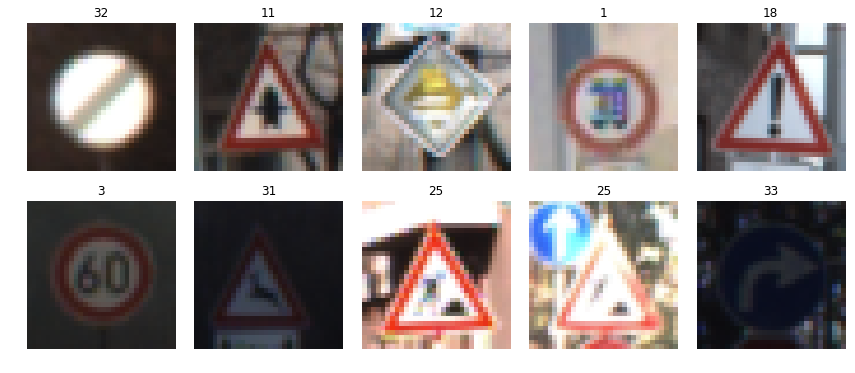

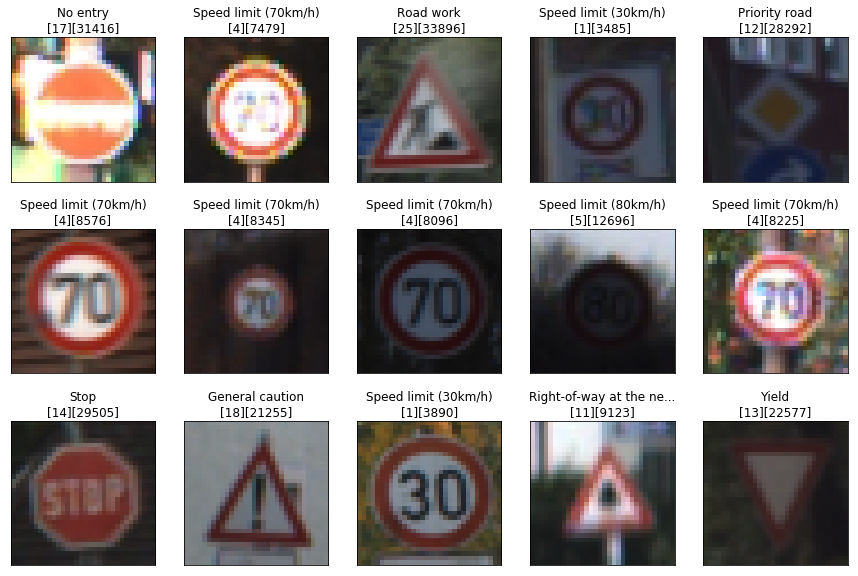

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train_uint8))
    image = X_train_uint8[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train_unaugmented[index])

def exploreData(images, labels, translation):
    """
    Visualize a random selection of images from `images`. 
    Showing the index and the label on the image title as:
    SIGNAL_NAME
    [label value][index value]
    """
    imgLength = len(images)
    assert(imgLength == len(labels))
    columns = 5
    rows = 3    
    imgW, imgH, _ = images[0].shape
    fig, axes = plt.subplots(rows, columns, figsize=(15,10),
                         subplot_kw={'xticks': [], 'yticks': []})
   
    indexes = list(random.randint(0, imgLength) for r in range(columns * rows))
    labelLimit = 25
    for ax, index in zip(axes.flat, indexes):
        ax.imshow(images[index])
        label = labels[index]
        name = translation[label]
        if len(name) > labelLimit - 3:
            name = name[:labelLimit - 3] + '...'
        ax.set_title("{1}\n[{2}][{0}]".format(index, name, label))


exploreData(X_train_uint8, y_train_unaugmented, SignLabel2Name)

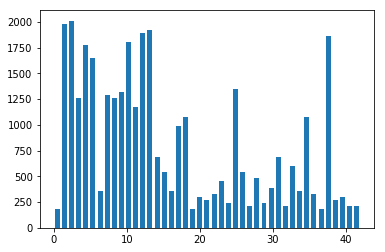

In [4]:
# histogram of label frequency
hist, bins = np.histogram(y_train_unaugmented, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

25


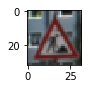

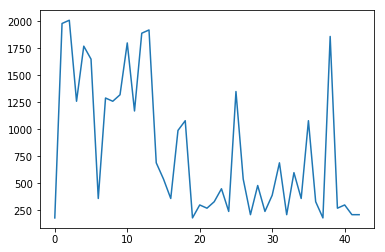

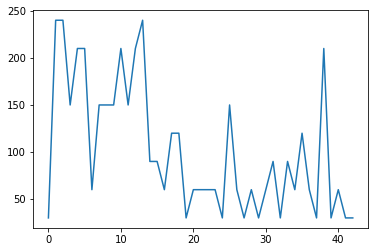

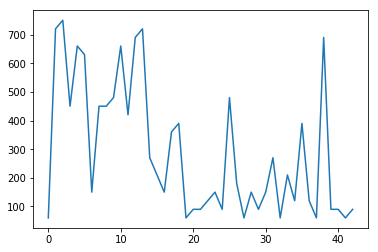

In [5]:
index = random.randint(0,n_train_unaugmented)

image = X_train_uint8[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train_unaugmented[index])

# Print histograms of the labels in each data set.  
# Some labels appear much more often than others.
# However, the distribution of labels in the training, test, and validation sets is 
# very similar.
plt.figure()
hist_train = np.histogram(y_train_unaugmented,n_classes)
plt.plot(np.arange(0,n_classes,1),hist_train[0])
plt.figure()
hist_valid = np.histogram(y_valid,n_classes)
plt.plot(np.arange(0,n_classes,1),hist_valid[0])
plt.figure()
hist_test = np.histogram(y_test,n_classes)
plt.plot(np.arange(0,n_classes,1),hist_test[0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# I'm not going to convert to grayscale; it destroys data before the network even 
# has a chance to play with it.

print("Before processing:")

print("X_train_uint8.dtype = {}".format(X_train_uint8.dtype))
print("np.min(X_train_uint8) = {}".format(np.min(X_train_uint8)))
print("np.max(X_train_uint8) = {}".format(np.max(X_train_uint8)))
print()
print("X_valid_uint8.dtype = {}".format(X_valid_uint8.dtype))
print("np.min(X_valid_uint8) = {}".format(np.min(X_valid_uint8)))
print("np.max(X_valid_uint8) = {}".format(np.max(X_valid_uint8)))
print()
print("X_test_uint8.dtype = {}".format(X_test_uint8.dtype))
print("np.min(X_test_uint8) = {}".format(np.min(X_test_uint8)))
print("np.max(X_test_uint8) = {}".format(np.max(X_test_uint8)))
print()

# Normalize and convert to 32-bit floating point
f128 = np.float32(128)
X_train_unaugmented = (X_train_uint8.astype(np.float32)-f128)/f128
X_valid = (X_valid_uint8.astype(np.float32)-f128)/f128
X_test = (X_test_uint8.astype(np.float32)-f128)/f128

# Sanity checks to ensure that the data is float32 and properly normalized
print("After processing:")

print("X_train_unaugmented.dtype = {}".format(X_train_unaugmented.dtype))
print("np.min(X_train_unaugmented) = {}".format(np.min(X_train_unaugmented)))
print("np.max(X_train_unaugmented) = {}".format(np.max(X_train_unaugmented)))
print()
print("X_valid.dtype = {}".format(X_valid.dtype))
print("np.min(X_valid) = {}".format(np.min(X_valid)))
print("np.max(X_valid) = {}".format(np.max(X_valid)))
print()
print("X_test.dtype = {}".format(X_test.dtype))
print("np.min(X_test) = {}".format(np.min(X_test)))
print("np.max(X_test) = {}".format(np.max(X_test)))
print()

Before processing:
X_train_uint8.dtype = uint8
np.min(X_train_uint8) = 0
np.max(X_train_uint8) = 255

X_valid_uint8.dtype = uint8
np.min(X_valid_uint8) = 0
np.max(X_valid_uint8) = 255

X_test_uint8.dtype = uint8
np.min(X_test_uint8) = 0
np.max(X_test_uint8) = 255

After processing:
X_train_unaugmented.dtype = float32
np.min(X_train_unaugmented) = -1.0
np.max(X_train_unaugmented) = 0.9921875

X_valid.dtype = float32
np.min(X_valid) = -1.0
np.max(X_valid) = 0.9921875

X_test.dtype = float32
np.min(X_test) = -1.0
np.max(X_test) = 0.9921875



In [7]:
import scipy.ndimage as scnd

def augment_image(img):
    
    # Rotate image by a random amount <= 15 degrees.
    # The rotation operation resizes the image to a greater size, so we also zoom in to
    # the central 32x32 section.  The sign should still be contained for smallish rotations.
    angle = np.random.normal(0.,10)
    if(angle > 15.):
        angle = 15.
    if(angle < -15.):
        angle = -15.
        
    img = img.squeeze()
    
    rotated_img = scnd.interpolation.rotate(img,angle)
    
    # The rotation operation creates a larger image.  Zoom back to 32x32:
    edge_added = rotated_img.shape[0]-32
    bgn_zoomed = np.floor(edge_added/2).astype(int)
    end_zoomed = bgn_zoomed + 32
    rotated_zoomed_img = rotated_img[bgn_zoomed:end_zoomed,bgn_zoomed:end_zoomed,:]
    # plt.figure(figsize=(1,1))
    # plt.imshow(rotated_zoomed_img)
    
    noisy_img = rotated_zoomed_img + np.random.normal(0.,0.02,(32,32,3)).astype(np.float32)
    # plt.figure(figsize=(1,1))
    # plt.imshow(noisy_img)
    # print(np.max(rotated_zoomed_img))
    # print(np.max(noisy_img))
    return noisy_img

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import scipy.ndimage as scnd

def augment_image(img):
    
    # Rotate image by a random amount <= 15 degrees.
    # The rotation operation resizes the image to a greater size, so we also zoom in to
    # the central 32x32 section.  The sign should still be contained for smallish rotations.
    angle = np.random.normal(0.,10)
    if(angle > 15.):
        angle = 15.
    if(angle < -15.):
        angle = -15.
        
    img = img.squeeze()
    
    rotated_img = scnd.interpolation.rotate(img,angle)
    
    # The rotation operation creates a larger image.  Zoom back to 32x32:
    edge_added = rotated_img.shape[0]-32
    bgn_zoomed = np.floor(edge_added/2).astype(int)
    end_zoomed = bgn_zoomed + 32
    rotated_zoomed_img = rotated_img[bgn_zoomed:end_zoomed,bgn_zoomed:end_zoomed,:]
    # plt.figure(figsize=(1,1))
    # plt.imshow(rotated_zoomed_img)
    
    noisy_img = rotated_zoomed_img + np.random.normal(0.,0.02,(32,32,3)).astype(np.float32)
    # plt.figure(figsize=(1,1))
    # plt.imshow(noisy_img)
    # print(np.max(rotated_zoomed_img))
    # print(np.max(noisy_img))
    return noisy_img

In [9]:
n_train = n_train_unaugmented

# Decide to augment training set or not
augment_training_set = True
min_examples_per_label = 1000

# Precompute number of examples to append, using histogram of training set
if( augment_training_set ):
    for i in range( 0, n_classes ):
        if( hist_train[0][i] < min_examples_per_label ):
            num_augmented_to_add = min_examples_per_label - hist_train[0][i]
            n_train += num_augmented_to_add
            
            
# Preallocated storage for augmented examples so we don't have to call append() in an
# inner loop
total_augmented_to_add = n_train - n_train_unaugmented
print("Total augmented to add = {}".format(total_augmented_to_add))
X_train_augmented = \
    np.zeros( (total_augmented_to_add,image_shape[0],image_shape[1],image_shape[2]) )
y_train_augmented = \
    np.zeros( total_augmented_to_add, dtype=int )
    
augmented_example = 0
if( augment_training_set ):
    for i in range( 0, n_classes):
            if( hist_train[0][i] < min_examples_per_label ):
                num_augmented_to_add = min_examples_per_label - hist_train[0][i]
                print("Class {} has {} examples.  Augmenting with {} more.".\
                    format( i, hist_train[0][i], num_augmented_to_add ) )
                select_from_array = X_train_unaugmented[y_train_unaugmented == i]
                for j in range( 0, num_augmented_to_add ):
                    # Add a new image by picking a random existing example and augmenting it.
                    index = random.randint(0,hist_train[0][i]-1)
                    X_train_augmented[augmented_example] = \
                        augment_image( select_from_array[index] )
                    y_train_augmented[augmented_example] = i
                    augmented_example += 1
            
# Create full training data by concatenating original and augmented data            
X_train = np.concatenate((X_train_unaugmented,X_train_augmented))
y_train = np.concatenate((y_train_unaugmented,y_train_augmented))

print( "Size of augmented training set = {}".format( n_train ) )
print( "Length of X_train is now {}",format(X_train.shape))

Total augmented to add = 16891
Class 0 has 180 examples.  Augmenting with 820 more.
Class 6 has 360 examples.  Augmenting with 640 more.
Class 14 has 690 examples.  Augmenting with 310 more.
Class 15 has 540 examples.  Augmenting with 460 more.
Class 16 has 360 examples.  Augmenting with 640 more.
Class 17 has 990 examples.  Augmenting with 10 more.
Class 19 has 180 examples.  Augmenting with 820 more.
Class 20 has 300 examples.  Augmenting with 700 more.
Class 21 has 270 examples.  Augmenting with 730 more.
Class 22 has 330 examples.  Augmenting with 670 more.
Class 23 has 450 examples.  Augmenting with 550 more.
Class 24 has 240 examples.  Augmenting with 760 more.
Class 26 has 540 examples.  Augmenting with 460 more.
Class 27 has 210 examples.  Augmenting with 790 more.
Class 28 has 480 examples.  Augmenting with 520 more.
Class 29 has 240 examples.  Augmenting with 760 more.
Class 30 has 390 examples.  Augmenting with 610 more.
Class 31 has 690 examples.  Augmenting with 310 more.


In [10]:
### Shuffle data (will also be used prior to each epoch below)

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [11]:
### Hyperparameters

import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128
rate = 0.001
dropout = .75  # keep_prob for dropout layers

In [12]:
from tensorflow.contrib.layers import flatten

### Added a keep_prob for dropout layers to the argument list.
def myLeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # conv1 = tf.nn.sigmoid(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # conv2 = tf.nn.sigmoid(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)
                          
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # fc1 = tf.nn.sigmoid(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # fc2 = tf.nn.sigmoid(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

# For dropout layers in myLeNet
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
# Initially using optimizer and loss operation from LeNet lab...if this fails, I will modify.

logits = myLeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
# These are also taken from the LeNet lab to begin with.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={
            x: batch_x, 
            y: batch_y,
            keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Also taken from LeNet lab initially.  I added printing of validation accuracy to diagnose
# overfitting/underfitting.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training with {} examples...".format(num_examples))
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={
                x: batch_x, 
                y: batch_y,
                keep_prob: dropout})

        print("EPOCH {} ...".format(i+1))   
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy   = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training with 51690 examples...

EPOCH 1 ...
Training Accuracy   = 0.869
Validation Accuracy = 0.781

EPOCH 2 ...
Training Accuracy   = 0.940
Validation Accuracy = 0.872

EPOCH 3 ...
Training Accuracy   = 0.963
Validation Accuracy = 0.900

EPOCH 4 ...
Training Accuracy   = 0.973
Validation Accuracy = 0.904

EPOCH 5 ...
Training Accuracy   = 0.980
Validation Accuracy = 0.923

EPOCH 6 ...
Training Accuracy   = 0.984
Validation Accuracy = 0.928

EPOCH 7 ...
Training Accuracy   = 0.986
Validation Accuracy = 0.934

EPOCH 8 ...
Training Accuracy   = 0.988
Validation Accuracy = 0.933

EPOCH 9 ...
Training Accuracy   = 0.991
Validation Accuracy = 0.940

EPOCH 10 ...
Training Accuracy   = 0.992
Validation Accuracy = 0.943

EPOCH 11 ...
Training Accuracy   = 0.991
Validation Accuracy = 0.943

EPOCH 12 ...
Training Accuracy   = 0.994
Validation Accuracy = 0.953

EPOCH 13 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.956

EPOCH 14 ...
Training Accuracy   = 0.995
Validation Accuracy = 0.9

In [17]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.949


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

uint8
Image 0 = bicyclecrossing.jpg
Image 1 = nopassing.jpg
Image 2 = straightorright.jpg
Image 3 = roadwork.jpg
Image 4 = childrencrossing.jpg


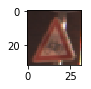

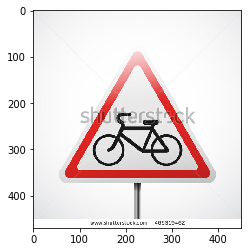

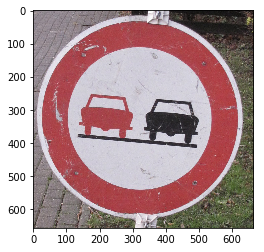

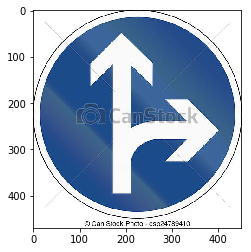

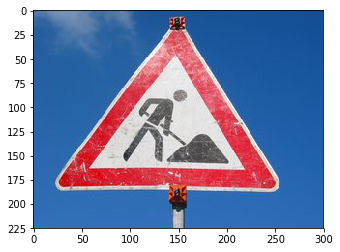

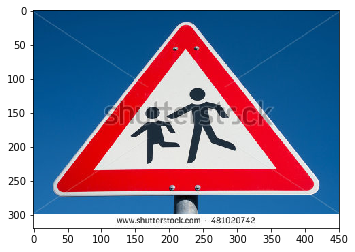

In [18]:
# The following code lets me view sample images from the unaugmented input training data,
# based on their numeric key.  This helps me find corresponding examples online.

# Numeric key corresponding to a certain sign type, as found in signnames.csv
numeric_key = 29
select_from_array = X_train_uint8[y_train_unaugmented == numeric_key]
index = random.randint(0,len(select_from_array))
sample_image = select_from_array[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(sample_image)

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import scipy.misc as scms

n_images_web = 5

X_test_web_uint8 = np.zeros((n_images_web,32,32,3),dtype=np.uint8)
print(X_test_web_uint8.dtype)

dir = 'mysigns/'
names = ['bicyclecrossing.jpg',\
         'nopassing.jpg',\
         'straightorright.jpg',\
         'roadwork.jpg',\
         'childrencrossing.jpg']

Y_test_web = np.array([29,9,36,25,28,])

for name,i in zip(names,range(0,5)):
    image = mpimg.imread(dir+name)
    print("Image {} = {}".format(i,name))
    plt.figure()
    plt.imshow(image)
    # Resize to 32x32 and store in the array of test data
    resized_image = scms.imresize(image,(32,32,3))
    X_test_web_uint8[i] = resized_image

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Create normalized, zero-mean versions of web images
f128 = np.float32(128)
X_test_web = (X_test_web_uint8.astype(np.float32)-f128)/f128

# plt.figure()
# plt.imshow(X_test_web_uint8[1])

# print(X_test_web[0].dtype)
# print(np.max(X_test_web[0]))
# print(np.min(X_test_web[0]))

prediction = tf.argmax( logits, 1 )

# Redeclare in case you want to run this cell alone.
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    output = sess.run(prediction, feed_dict={
        x: X_test_web, 
        keep_prob: 1.0})
    
print("Output classes:")
print("Expected: \n\
       29 (bicycles crossing), \n\
       9 (no passing), \n\
       36 (go straight or right), \n\
       25 (road work), \n\
       28 (children crossing)")
print('Actual:')
print(output)

INFO:tensorflow:Restoring parameters from ./lenet
Output classes:
Expected: 
       29 (bicycles crossing), 
       9 (no passing), 
       36 (go straight or right), 
       25 (road work), 
       28 (children crossing)
Actual:
[29  9 36 25 28]


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    accuracy = sess.run(accuracy_operation, feed_dict={
            x: X_test_web, 
            y: Y_test_web,
            keep_prob: 1.0})
    print( "Accuracy = {}%".format( accuracy*100. ) )

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy = 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
Top softmax probabilities:

bicyclecrossing.jpg:
Probabilities
[  9.96851504e-01   1.89795019e-03   4.55321278e-04   3.66068765e-04
   2.13765321e-04]
Corresponding labels
[29 23 25 31 28]

nopassing.jpg:
Probabilities
[  9.99999642e-01   2.16804864e-07   9.84563897e-08   1.20501076e-08
   7.39935713e-09]
Corresponding labels
[ 9 16 23 32 41]

straightorright.jpg:
Probabilities
[  1.00000000e+00   3.09375030e-13   3.63545143e-15   5.42122527e-17
   2.57490964e-18]
Corresponding labels
[36 38 28 12 26]

roadwork.jpg:
Probabilities
[  9.99986410e-01   1.25497627e-05   1.09031464e-06   5.91120708e-10
   1.61691285e-10]
Corresponding labels
[25 29 22 31 30]

childrencrossing.jpg:
Probabilities
[  9.99998808e-01   9.53043980e-07   1.32998622e-07   1.09041082e-07
   6.95710489e-10]
Corresponding labels
[28 29 30 20 23]


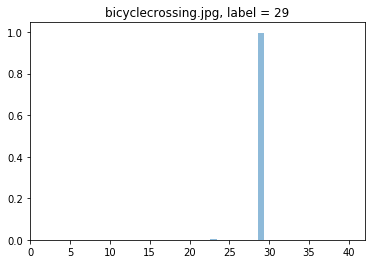

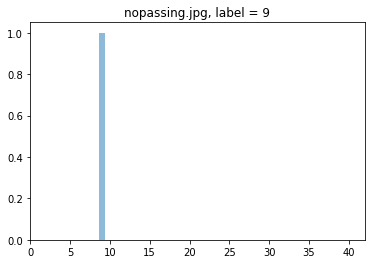

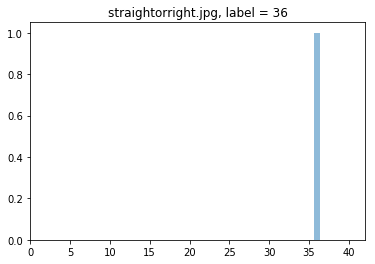

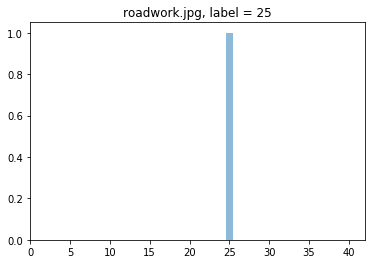

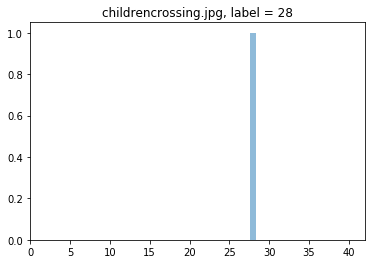

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_k_getter = tf.nn.top_k(tf.nn.softmax(logits),5)

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    output = sess.run(top_k_getter, feed_dict={
        x: X_test_web, 
        keep_prob: 1.0})

print("Top softmax probabilities:")

for i in range(5):
    print()
    print( "{}:".format( names[i] ) )
    print( "Probabilities")
    print(output.values[i])
    print( "Corresponding labels")
    print(output.indices[i])
    plt.figure()
    plt.bar(output.indices[i],output.values[i], align='center', alpha=0.5)
    plt.xlim([0,42])
    plt.title("{}, label = {}".format( names[i], Y_test_web[i] ) )

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")